# COSE474_HW1
## 2022320009 이수현

discussion or takeway messages는 각 챕터에 있습니다.

## 2.1. Data Manipulation

data -> 1)acquire 2)process

tensor class supports -> automatic differentiation(자동미분), GPU로 accelerate numerical computation

=> 신경망은 코딩이 쉽고 실행 속도가 빠름

### 2.1.1.getting started

In [1]:
import torch

In [2]:
x = torch.arange(12, dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

**arange** : 지정된 범위에서 일정간격(기본1)으로 값을 생성

torch.arange(12, dtype=torch.float32) => 0~11까지, data type은 float32

-> 그렇다면 간격을 2로 하고 싶다면?
arange(start, end, step) : step에 간격값을 넣을 수 있음

In [3]:
y = torch.arange(0,12,2, dtype=torch.float32)
y

tensor([ 0.,  2.,  4.,  6.,  8., 10.])

In [4]:
x.numel()

12

**numel** : 텐서의 원소 수

In [5]:
x.shape

torch.Size([12])

**shape** : 텐서의 차원의 크기

**reshape** : 텐서의 크기, 값 변화 없이 모양만 변경

size n, target shape(h,w) => w=n/h 이므로
x.reshape(3,4)대신 x.reshape(-1,4)나 x.reshape(3,-1)도 가능

'-1'은 PyTorch가 나머지 차원의 값을 자동으로 게산해줌. 즉, -1은 자동으로 계산될 차원을 의미함!

In [6]:
X = x.reshape(3, 4)
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

실무에서 특정 값으로 초기화된 텐서를 자주 사용
=> 모든 원소가 0/1로 설정된 텐서 만들기

**zeros** : 모든 원소가 0인 텐서

**ones** : 모든 원소가 1인 텐서

In [7]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [8]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

무작위,독립적 샘플링

**randn** : n*m크기의 정규분포 랜덤 숫자의 텐서를 생성해줘

In [9]:
torch.randn(3, 4)

tensor([[ 1.3587,  0.0611,  0.3233, -0.8273],
        [-0.2127,  0.9823, -0.5997,  1.3423],
        [ 0.4562,  0.6575, -0.0273,  0.1166]])

중첩 리스트를 이용하여 텐서 생성

In [10]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

### 2.1.2.indexing and slicing

indexing : *0으로 시작*, 끝을 기준으로 접근하려면 음수 가능

slicing : 반환된 값에는 시작은 포함되지만 끝은 포함되지 않음

X[start : stop]이렇게 slicing하면 start ~ (stop-1)까지

In [11]:
X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

X[1, 2] = 17 : X텐서에서 (두번째 행,세번째 열)의 값(기존엔 6)을 17로 변경.

indexing은 항상 0부터 시작한다는 것을 잊지마!

In [12]:
X[1, 2] = 17
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5., 17.,  7.],
        [ 8.,  9., 10., 11.]])

여러개에 동일한 값을 할당하려면 할당 작업의 왼쪽에 indexing 적용!

X[:2, :] = 12 : ':2'=0~1의 행 , 전체 에 적용. 즉, 1열과 2열 모두를 12로 변경

In [13]:
X[:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

### 2.1.3.operations

In [14]:
torch.exp(x) #e의 거듭제곱

tensor([162754.7969, 162754.7969, 162754.7969, 162754.7969, 162754.7969,
        162754.7969, 162754.7969, 162754.7969,   2980.9580,   8103.0840,
         22026.4648,  59874.1406])

In [15]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [16]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)
#dim=0 : 첫번째 차원(행)을 기준으로 연결, dim=1 : 첫번째 차원(열)을 기준으로 연결

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

**cat** : 두 개의 텐서를 지정한 차원에서 연결

**dim=0** 행으로 연결 (세로로 길어짐)

**dim=1** 열로 연결 (가로로 길어짐)

각 위치 i, j에 대해 X[i, j]와 Y[i, j]가 같으면 1, 다르면 0

In [17]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [18]:
X.sum()

tensor(66.)

### 2.1.4.broadcasting

특정 조건에서는 모양이 달라도 broadcasting을 통해 연산 가능

(i) expand one or both arrays by copying elements along axes with length 1 so that after this transformation, the two tensors have the same shape : 두 텐서의 모양을 맞춤

(ii) perform an elementwise operation on the resulting arrays : 연산

In [19]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [20]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

### 2.1.5.saving memory

Y = Y + X와 같은 연산을 수행하면, 새로운 메모리가 할당되어 결과를 저장.

Y는 원래 가리키던 메모리 주소를 해제하고 새로 할당된 메모리 주소를 가리킨다.

In [21]:
before = id(Y)
Y = Y + X
id(Y) == before

False

false가 나왔다는건 Y가 새로운 메모리 주소를 가리킨다는것!!!

문제
1. 메모리 비효율적
2. 참조 관리가 힘듦

=> in-place operation : slice를 이용하여 연산 결과를 이전에 할당된 배열에 저장.

Y[:] = <'expression'>

we overwrite the values of tensor Z, after initializing it, using zeros_like, to have the same shape as Y.

In [22]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 137959216371072
id(Z): 137959216371072


In [23]:
before = id(X)
X += Y
id(X) == before

True

### 2.1.6.conversion to other python objects

In [24]:
A = X.numpy()
B = torch.from_numpy(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [25]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

### 2.1.7 summary

### 2.1.8 exercises

1. Run the code in this section. Change the conditional statement X == Y to X < Y or X > Y, and then see what kind of tensor you can get.

In [26]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
x,y

(tensor([1., 2., 4., 8.]), tensor([2, 2, 2, 2]))

In [27]:
x<y

tensor([ True, False, False, False])

In [28]:
x>y

tensor([False, False,  True,  True])

2. eplace the two tensors that operate by element in the broadcasting mechanism with other shapes, e.g., 3-dimensional tensors. Is the result the same as expected?

In [29]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [30]:
a+b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

In [31]:
a3d = torch.arange(3).reshape((3, 1, 1))
b3d = torch.arange(2).reshape((1, 1, 2))
a3d + b3d

tensor([[[0, 1]],

        [[1, 2]],

        [[2, 3]]])

=> 두개의 결과(a+b와 a3d+b3d0는 값만 보면 동일하게 나온다. 즉, broadcasting을 이용하면 2차원이든 3차원이든 상관없이 잘 계산된다.

### discussions or takeaway messages

1. arange : 지정된 범위에서 일정간격(기본1)으로 값 생성
	범위 바꾸고 싶으면 step에 숫자 넣기 : arange(start, end, step)

2. numel : 텐서 차원 크기

3. reshape : 텐서 모양 변경
	'-1'을 넣으면 자동으로 차원 계산됨. 어차피 12=3*4 처럼 계산이 되기 때문에

4. zeroes / ones : 텐서의 모든 값을 0/1로

5. randn(n,m) : n*m크기의 정규분포 난수 생성

6. indexing은 항상 0부터 시작을 잊지마

7. slicing [A,B]이면 A ~ (B-1)까지

8. cat(X,Y, dim=0or1) : 두 개의 텐서를 연결 (dim=0:행으로 연결, dim=1:열로 연결)

9. broadcasting : 모양이 다른 두 텐서를 모양을 맞춰서 연산함

10. 메모리 관리 : 새로운 메모리 할당은 메모리 비효율적+참조관리 힘듦의 문제를 발생시키기 때문에 가능하면 in-place로

## 2.2.Data Preprocsessing


### 2.2.1.reading the dataset
csv파일 가져오기

In [32]:
import os

current_directory = os.getcwd()
print("Current Directory:", current_directory)

parent_directory = os.path.dirname(current_directory)
print("Parent Directory:", parent_directory)

Current Directory: /content
Parent Directory: /


In [33]:
os.makedirs('data', exist_ok=True)
data_file = os.path.join('data', 'house_tiny.csv')

with open(data_file, 'w') as f:
    f.write('''NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000''')

In [34]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000


### 2.2.2.data preparation

* 지도학습 : 일부 입력 값 집합이 주어지면 지정된 목표 값을 예측.


  데이터셋을 input : target values로 분리 -> iloc이용

* CSV 모든값을 NaN으로 처리할수도,....->missing values


  missing values -> 1)imputation 2)deletion

* common imputation heuristics


  범주형 입력 필드에서 NaN값을 하나의 범주로 취급하여 결측치를 처리


  RoofType : Slate / NaN

  RoofType_Slate : RoofType가 Slate면 1, 아니면 0

  RoofType_NaN : RoofType가 Slate면 1, 아니면 0

  RoofType가 Slate인 경우: RoofType_Slate는 1, RoofType_nan은 0

  RoofType가 NaN인 경우: RoofType_Slate는 0, RoofType_nan은 1


In [35]:
inputs, targets = data.iloc[:, 0:2], data.iloc[:, 2] #데이터 분리~
inputs = pd.get_dummies(inputs, dummy_na=True)
#dummy_na=True : 결측치를 별도의 카테고리로 간주 -> RoofType_nan생성 : 결측치이면 1, 아니면 0
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       NaN           False          True
1       2.0           False          True
2       4.0            True         False
3       NaN           False          True


In [36]:
inputs = inputs.fillna(inputs.mean()) #fillna : 결측치를 특정값으로 대체 -> mean평균값로로
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       3.0           False          True
1       2.0           False          True
2       4.0            True         False
3       3.0           False          True


### 2.2.3.conversion to the tensor format

In [37]:
import torch

X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(targets.to_numpy(dtype=float))
X, y

(tensor([[3., 0., 1.],
         [2., 0., 1.],
         [4., 1., 0.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

### 2.2.4.discussion

데이터 처리가 더 어려워질것. 단일 CSV파일 대신 관계형 DB의 여러 파일이.

범주형 및 숫자를 넘어서는 다양한 data types.

데이터 처리가 머신 러닝에서 가장 큰 bottleneck가 되는 것을 방지하기 위해 advanced tools and efficient algorithms가 필요

데이터 품질에 주의. 이상치, 잘못된 측정값, 기록 오류 등

eaborn, Bokeh, or matplotlib등의 시각화 도구가 도움이 될 수 있다

### 2.2.5.exercises

1. Try loading datasets, e.g., Abalone from the UCI Machine Learning Repository and inspect their properties. What fraction of them has missing values? What fraction of the variables is numerical, categorical, or text?

-> url 연결 페이지가 not found나옵니다

2. Try indexing and selecting data columns by name rather than by column number. The pandas documentation on indexing has further details on how to do this.

In [38]:
print(data)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000


In [39]:
numRooms = data['NumRooms']
roofType = data['RoofType']
price = data['Price']

print("NumRooms:\n", numRooms)
print("RoofType:\n", roofType)
print("Price:\n", price)

NumRooms:
 0    NaN
1    2.0
2    4.0
3    NaN
Name: NumRooms, dtype: float64
RoofType:
 0      NaN
1      NaN
2    Slate
3      NaN
Name: RoofType, dtype: object
Price:
 0    127500
1    106000
2    178100
3    140000
Name: Price, dtype: int64


3. How large a dataset do you think you could load this way? What might be the limitations? Hint: consider the time to read the data, representation, processing, and memory footprint. Try this out on your laptop. What happens if you try it out on a server?

-> 데이터가 너무 크면 load하고 처리하는데 시간이 너무 오래 걸리고, 데이터를 저장할 메모리 공간도 부족해진다. 또한 Pandas는 데이터를 data frame형태로 저장하는데, 이는 문자열 데이터 보다 더 많은 메모리 공간을 차지한다. 노트북 사양에 따라 다르겠지만 일반적으로 노트북보다는 서버가 더 많은 RAM이 있기 때문에 서버에서 큰 데이터를 다루는 것이 더 좋다고 생각한다.

4. How would you deal with data that has a very large number of categories? What if the category labels are all unique? Should you include the latter?

-> 카테고리가 매우 많다면 비슷한 카테고리를 하나로 묶던지 아니면 자주 나오지 않는 카테고리는 drop하거나 '그 외'등 하나로 묶을 수 있을 것 같다. 또한 PCA등의 기법을 사용해서 카테고리 차원을 축소시킬 수 있다.

카테고리 label들이 모두 unique하다면 모든 카테고리를 커버하는것은 너무 많기도하고 질 좋은 결과가 나오지 않을 것이기 때문에 자주나오거나 결과에 영향이 있을만큼 데이터가 많은 카테고리 위위주로 선별해야할 것 같다.

5. What alternatives to pandas can you think of? How about loading NumPy tensors from a file? Check out Pillow, the Python Imaging Library.

-> numpy는 배열기반의 데이터를 처리하기에 좋은 라이브러리다.

   Pillow는 python imaging library로, 이미지 처리하기 좋은 라이브러리다.

In [ ]:
import numpy as np

pra25 = np.array([[7, 49, 63], [3, 9, 27]])
np.save('pra25.npy', data)

loaded_pra = np.load('pra25.npy')
print(loaded_pra)

[[1 2 3]
 [4 5 6]]


### discussions or takeaway messages

1. pandas로 데이터 load하는 것은 꽤 해봐서 익숙함

2. RoofType : NaN값을 하나의 범주로 취급하여 결측치를 처리

	RoofType가 Slate인 경우: RoofType_Slate는 1, RoofType_nan은 0

	RoofType가 NaN인 경우: RoofType_Slate는 0, RoofType_nan은 1

    -> 결측치를 단순히 버리는게 아니라 결측치 정보로 다룰 수 있게 함!

3. 결측치 종류에는 무엇이?

   
	A) Missing completely at random (MCAR) - 완전 무작위 결측


   :입력값 누락, 전산 오류 등 결측치 발생이 데이터와 상관 없음


	B) Missing at random (MAR) - 무작위 결측

	:결측치가 있을 확률이 관측된 데이터에 따라 다름. 결측값의 발생이 특정 변수와 관련이 있으나 얻고자 하는 결과와는 상관이 없을 경우


	C) Not missing at random (NMAR) - 비무작위 결측

	:결측값 발생이 다른 변수와 상관 있음

5. 결측치 처리 방법

   
	삭제 / 대체(평균값, 중간값, 최빈값 등) / 모델기반대체(KNN, ML, 회귀, RandomForest 등)




## 2.3.Linear Algebra

In [41]:
import torch

### 2.3.1.scalars

In [42]:
x = torch.tensor(3.0)
y = torch.tensor(2.0)

x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

### 2.3.2.vectors

In [43]:
x = torch.arange(3)
x

tensor([0, 1, 2])

In [44]:
x[2]
#tensor의 세번째 element에 접근 -> tensor(2) : 세번째 element는 tensor 형태로 저장된 숫자 2다.

tensor(2)

In [45]:
len(x) #길이

3

In [46]:
x.shape #차원

torch.Size([3])

### 2.3.3.matrices

In [47]:
A = torch.arange(6).reshape(3, 2)
A

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [48]:
A.T

tensor([[0, 2, 4],
        [1, 3, 5]])

In [49]:
A = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
A == A.T #대칭인지 확인

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

### 2.3.4.tensors

tensor는 n차원 array를 표현하는 일반적인 방법

이미지 작업에도 중요. 각 이미지 : 높이, 넓이, channel에 해당하는 축으로 tensor 정렬.

In [50]:
torch.arange(24).reshape(2, 3, 4)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

### 2.3.5.basic properties of tensor arithmetic

In [51]:
A = torch.arange(6, dtype=torch.float32).reshape(2, 3)
B =A.clone()
A, A + B

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]))

In [52]:
A * B

tensor([[ 0.,  1.,  4.],
        [ 9., 16., 25.]])

In [53]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

### 2.3.6.reduction

In [54]:
x = torch.arange(3, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2.]), tensor(3.))

In [55]:
A.shape, A.sum()

(torch.Size([2, 3]), tensor(15.))

sum function -> 모든 축을 따라 tensor가 감소해서 결국 scala로 만들어짐.

라이브러리를 사용하여 tensor를 축소해야하는 축을 지정할 수 있다. 아래의 예시.

axis=0(행) , 1(열)

In [56]:
A.shape, A.sum(axis=0).shape #축소해야하는 축 지정. axis=0 : 첫번째 축(행)을 기준으로.

(torch.Size([2, 3]), torch.Size([3]))

In [57]:
A.shape, A.sum(axis=1).shape #축소해야하는 축 지정. axis=1 : 첫번째 축(열)을 기준으로.

(torch.Size([2, 3]), torch.Size([2]))

In [58]:
A.sum(axis=[0, 1]) == A.sum()
#행과 열을 모두 기준으로 합침. A는 2차원이므로 걍 다 합치겠다는말...! sum과 같은 기능을 한다~

tensor(True)

In [59]:
A.sum(axis=[0, 1])

tensor(15.)

In [60]:
A.sum()

tensor(15.)

In [61]:
A.mean(), A.sum() / A.numel() #numel은 element의 개수!

(tensor(2.5000), tensor(2.5000))

In [62]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([1.5000, 2.5000, 3.5000]), tensor([1.5000, 2.5000, 3.5000]))

### 2.3.7.non-reduction sum

sum이나 mean계산시에 axes의 수를 유지하는게 좋을 때가 있음,

특히 broadcast에서.

In [63]:
sum_A = A.sum(axis=1, keepdims=True) #keepdims=True
sum_A, sum_A.shape

(tensor([[ 3.],
         [12.]]),
 torch.Size([2, 1]))

In [64]:
A / sum_A

tensor([[0.0000, 0.3333, 0.6667],
        [0.2500, 0.3333, 0.4167]])

In [65]:
A.cumsum(axis=0)

tensor([[0., 1., 2.],
        [3., 5., 7.]])

### 2.3.8.dot products

내적!

In [66]:
y = torch.ones(3, dtype = torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2.]), tensor([1., 1., 1.]), tensor(3.))

In [67]:
torch.sum(x * y)

tensor(3.)

### 2.3.9.martix-vector products

In [68]:
A.shape, x.shape, torch.mv(A, x), A@x

#torch.mv(A, x) : 행렬곱 계산. 행렬A와 벡터x의 내적을 계산한 벡터값 (행렬,벡터)
#A @ x : 행렬곱 계산의 다른 방식.

(torch.Size([2, 3]), torch.Size([3]), tensor([ 5., 14.]), tensor([ 5., 14.]))

### 2.3.10.matrix-matrix multiplication

In [69]:
B = torch.ones(3, 4)
torch.mm(A, B), A@B

#torch.mm(A, B) : 행렬 곱 계산.(행렬,행렬)

(tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]),
 tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]))

### 2.3.11.norms

벡터의 크기

벡터를 스칼라에 mapping하고 세가지 속성을 충족
 1. ||ax|| = ||a||||x||
 2. ||x+y||<=||x||+||y||
 3. ||x||>0 for all x!=0

In [70]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In [71]:
torch.abs(u).sum()

#torch.abs(u) : tensor u의 각 element의 절대값

tensor(7.)

In [72]:
torch.norm(torch.ones((4, 9)))

#4*9 모두 1로 이루어진 행렬.
#전체 크기 = 루트(1+1+..+1) = 루트(36) = 6

tensor(6.)

### 2.3.12.discussion

Scalars, vectors, matrices, and tensors는 각각 0,1,2,n개의 축을 갖는다

tensor은 indexing, sum, mean등의 연산으로 axis를 따라 자르거나 줄일 수 있다

Elementwise products are called Hadamard products

dot products, matrix–vector products, and matrix–matrix products are not elementwise operations

Hadmard products보다 matrix-matrix product가 계산 시간이 오래 걸린다


### discussions or takeaway messages

1. 선형대수

2. tensor를 사용해서 축을 따라 자르거나 줄일 수 있다.

3. 축 지정도 가능 : axis=0(행) , 1(열)

4. broadcast에서는 축의 수를 유지하는게 좋을 수 있음

5. torch.mv(A,x) : 행렬A와 벡터x의 행렬곱 계산 / A@x로 도 가능

6. torch.mm(A, B) : 행렬A와 행렬B의 행렬곱 계산 / A@B도 가능

## 2.5.Automatic Differentiation

In [73]:
import torch

### 2.5.1.a simple function

differentiatiog the function y=2(x^T)x

In [74]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

변수 y에 대해 x미분을 하기 전에 저장할 공간이 필요함 -> 새로운 메모리 할당은 피해 -> y에 저장할께

In [75]:
x.requires_grad_(True)
x.grad  # 기본적으로 gradient는 none임

In [76]:
y = 2 * torch.dot(x, x) #x내적x = 1 + 4 + 9 = 14 -*2-> 28
y

tensor(28., grad_fn=<MulBackward0>)

backward method를 통해 x에 대한 y의 gradient를 구함.

In [77]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

-> 이거 계산을 어떻게 아는거?
: PyTorch가 연산 그래프를 추적하여 어떤 게산이 이루어졌는지 알고 있어서 그걸 바탕으로 미분을 계산한다고 함!

2x^2의 미분 = 4x = [0,4,8,12]

In [78]:
x.grad == 4 * x

tensor([True, True, True, True])

In [79]:
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

### 2.4.2.backward for non-scalar variables

y가 벡터일때 벡터x에 대한 y의 도함수의 표현 => x의 각 성분에 대한 y의 각 성분의 부분 도함수를 포함하는 Jacobian

Jacobian : 전체 벡터 x에 대한 y의 각 요소의 기울기를 sum up -> x와 같은 shape의 벡터를 생성

In [80]:
x.grad.zero_()
y = x * x
y.backward(gradient=torch.ones(len(y)))  # Faster: y.sum().backward()
#y의 각 요소의 gradient를 1로 설정 -> y.sum().backward()와 같은 효과.
#y의 요소들을 모두 더하고, 그 sum에 대해 backward
x.grad

tensor([0., 2., 4., 6.])

### 2.5.3.detaching computation

detach() : tensor를 계산 그래프에서 분리. 그 tensor는 이제 그래프의 일부가 아니고 그에 대한 gradient가 전파되지 않음

In [81]:
x.grad.zero_()
y = x * x
u = y.detach() #u는 y의 값을 가지지만 그래프에서 분리된 tensor!
z = u * x

z.sum().backward() #z.sum하고 backward -> 여기서 x의 gradient계산됨
x.grad == u

tensor([True, True, True, True])

u는 그래프에서 분리된 tensor -> y의 기울기를 전파하지 않으며 u를 통해 x로의 gradient 전파가 이루어지지 않는다.

z = u * x. u는 y의 값을 가져오지만 y의 기울기를 전파하지 않으므로 z는 x에 대한 직접적인 연산으로만 계산됨...!

y=x*x로 정의된 y는 계산그래프에 남아있음. y를 생성하는 연산은 그래프에 남아 있으므로(y로 이어지는 계산그래프는 지속되므로) x에 대한 y의 기울기를 계산할 수 있음

=> 간접적인 영향 없이 직접적인 연관만 고려하여 gradient 계산하기

In [82]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

### 2.5.4.gradients and python control flow

automatic differentiation -> python control flow를 통과하는데 필요한 함수의 계산 그래프를 구축하더라도 결과 변수의 gradient를 계산할 수 있다

In [83]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [84]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [85]:
a.grad == d / a

tensor(True)

### 2.5.5.discussion

automatic differentiation -> 효율적

autograd to optimize models, 근데 optimization of autograd libraries도 중요함

(i) attach gradients to those variables with respect to which we desire derivatives; 원하는 변수에 gradient 연결

(ii) record the computation of the target value; 목표값의 계산 기록

(iii) execute the backpropagation function; backpropagation 함수 실행

(iv) access the resulting gradient.

### discussions or takeaway messages

1. automatic differentiation 자동 미분

2. detach() : tensor를 계산 그래프에서 분리. 더이상 gradient가 전파되지 않음.

3. 하지만 기존의 연산은 계산 그래프에 남아있으므로 gradient를 구할 수 있다

4. traget 변수에 gradient 연결 -> traget value 계산 기록 -> backpropagation -> resulting gradient.

5. 사실 완벽하게 이해하진 못한 듯 하다 좀 더 공부해야겠다.

## 3.1.Linear Regression

In [87]:
pip install d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.5 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 89.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 7.9 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uni

In [1]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

### 3.1.1.basics

#### 3.1.1.1.model

#### 3.1.1.2.loss function
손실함수 : 실제 값과 예측 값 사이의 거리를 quantify.
작을수록 좋음
보통 regression 문제의 경우 loss function은 squared error.

#### 3.1.1.3.analutic solution

#### 3.1.1.4.minibatch stochastic gradient descent
경사하강법의 일종ㅈ데이터셋을 여러개의 미니배치로 나눈다 -> 각 미니배치에 대해 loss function을 계산하고 기울기를 구함 -> parameter 업데이트 -> epoch하면서 업데이트를 반복

#### 3.1.1.5.predictions

### 3.1.2.vectorization for speed

In [2]:
n = 10000
a = torch.ones(n)
b = torch.ones(n)

In [3]:
c = torch.zeros(n)
t = time.time()
for i in range(n):
    c[i] = a[i] + b[i]
f'{time.time() - t:.5f} sec'

'0.41876 sec'

In [4]:
t = time.time()
d = a + b
f'{time.time() - t:.5f} sec'

'0.00027 sec'

### 3.1.3.the normal distribution and squared loss

In [5]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 * (x - mu)**2 / sigma**2)

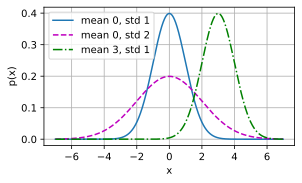

In [6]:
x = np.arange(-7, 7, 0.01)
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params],
         xlabel='x', ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

### 3.1.4.linear regression as a neural network

### 3.1.5.summary

traditional linear regression

선형 함수의 파라미터 -> squared loss 줄이는 방향으로

gaussian noise를 가정한 maximum likelihood estimation

선형모델들이 단순히 신경망으로 표현될 수 있음

### discussions or takeaway messages

1. 전통적인 선형 회귀 방법

2. 손실 함수

3. minibatch stochastic gradient descent : 데이터를 여러개의 작은 사이즈(미니배치)로 나눠서 각각의 loss function을 구하고 업데이트

## 3.2.Object-Oriented Design for Implementation

high level 의three classes를 제공

(i) Module contains models, losses, and optimization methods

(ii) DataModule provides data loaders for training and validation

(iii) both classes are combined using the Trainer class, which allows us to train models on a variety of hardware platforms.


In [7]:
import time
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

### 3.2.1.utilities

In [8]:
def add_to_class(Class):
    def wrapper(obj):
        setattr(Class, obj.__name__, obj)
    return wrapper

In [9]:
class A:
    def __init__(self):
        self.b = 1

a = A()

In [10]:
@add_to_class(A) #기존 class에 새로운 method를 추가
def do(self):
    print('Class attrib|ute "b" is', self.b)

a.do()

Class attrib|ute "b" is 1


In [11]:
class HyperParameters:
    """The base class of hyperparameters."""
    def save_hyperparameters(self, ignore=[]):
        raise NotImplemented

In [12]:
class HyperParameters:
    """The base class of hyperparameters."""
    def save_hyperparameters(self, ignore=[], **kwargs):
        params = {k: v for k, v in kwargs.items() if k not in ignore}
        for k, v in params.items():
            setattr(self, k, v)

class B(HyperParameters):
    def __init__(self, a, b, c):
        self.save_hyperparameters(ignore=['c'], a=a, b=b)
        print('self.a =', self.a, 'self.b =', self.b)
        print('There is no self.c =', not hasattr(self, 'c'))

b = B(a=1, b=2, c=3)

self.a = 1 self.b = 2
There is no self.c = True


In [13]:
class ProgressBoard(d2l.HyperParameters):
    """The board that plots data points in animation."""
    def __init__(self, xlabel=None, ylabel=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 ls=['-', '--', '-.', ':'], colors=['C0', 'C1', 'C2', 'C3'],
                 fig=None, axes=None, figsize=(3.5, 2.5), display=True):
        self.save_hyperparameters()

    def draw(self, x, y, label, every_n=1):
        raise NotImplemented

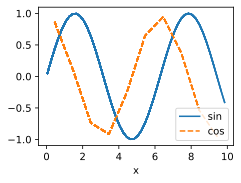

In [14]:
board = d2l.ProgressBoard('x')
for x in np.arange(0, 10, 0.1):
    board.draw(x, np.sin(x), 'sin', every_n=2)
    board.draw(x, np.cos(x), 'cos', every_n=10)

### 3.2.2.models
module class는 구현할 모든 모델의 기본.

최소 3가지 방법이 필요

1. _init_운 헉습 가능한 매개변수를 저장
2. training_step method는 loss value를 반환하기 위해 data batch를 accept
3. configure_optimizer는 학습 가능한 매개변수를 업데이트하는데 사용되는 최적화 방법을 반환

In [15]:
class Module(nn.Module, d2l.HyperParameters):
    def __init__(self, plot_train_per_epoch=2, plot_valid_per_epoch=1):
        super().__init__()
        self.save_hyperparameters()
        self.board = ProgressBoard()

    def loss(self, y_hat, y):
        raise NotImplementedError

    def forward(self, X):
        assert hasattr(self, 'net'), 'Neural network is defined'
        return self.net(X)

    def plot(self, key, value, train):
        assert hasattr(self, 'trainer'), 'Trainer is not inited'
        self.board.xlabel = 'epoch'
        if train:
            x = self.trainer.train_batch_idx / \
                self.trainer.num_train_batches
            n = self.trainer.num_train_batches / \
                self.plot_train_per_epoch
        else:
            x = self.trainer.epoch + 1
            n = self.trainer.num_val_batches / \
                self.plot_valid_per_epoch
        self.board.draw(x, value.to(d2l.cpu()).detach().numpy(),
                        ('train_' if train else 'val_') + key,
                        every_n=int(n))

    def training_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=True)
        return l

    def validation_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=False)

    def configure_optimizers(self):
        raise NotImplementedError

### 3.2.3.data

DataModule class는 data의 기본 class.

_init_을 사용해 데이터를 준비.

train_dataloader는 train data set에 필요한 data loader를 반환

data loader는 python생성기, data batch를 생성 -> 손실을 계산하기 위해 모듈의 training_step method에 입력됨

val_dataloader는 유효성 검사 데이터 로더를 반환

In [70]:
class DataModule(d2l.HyperParameters):
    def __init__(self, root='../data', num_workers=4):
        self.save_hyperparameters()

    def get_dataloader(self, train):
        raise NotImplementedError

    def train_dataloader(self):
        return self.get_dataloader(train=True)

    def val_dataloader(self):
        return self.get_dataloader(train=False)

### 3.2.4.training

DataModule에 지정된 데이터로 module class에서 학습가능한 매개변수를 훈련함

-> module의 instance인 model, datamodule의 instance인 data를 accepts.

max_epochs만큼 반복

In [17]:
class Trainer(d2l.HyperParameters):
    def __init__(self, max_epochs, num_gpus=0, gradient_clip_val=0):
        self.save_hyperparameters()
        assert num_gpus == 0,

    def prepare_data(self, data):
        self.train_dataloader = data.train_dataloader()
        self.val_dataloader = data.val_dataloader()
        self.num_train_batches = len(self.train_dataloader)
        self.num_val_batches = (len(self.val_dataloader)
                                if self.val_dataloader is not None else 0)

    def prepare_model(self, model):
        model.trainer = self
        model.board.xlim = [0, self.max_epochs]
        self.model = model

    def fit(self, model, data):
        self.prepare_data(data)
        self.prepare_model(model)
        self.optim = model.configure_optimizers()
        self.epoch = 0
        self.train_batch_idx = 0
        self.val_batch_idx = 0
        for self.epoch in range(self.max_epochs):
            self.fit_epoch()

    def fit_epoch(self):
        raise NotImplementedError

### 3.2.5.summary

객체 지향 설계를 강조하기 위해 단순히 객체가 데이터를 저장하고 서로 상호작용하는 방식을 보여준것.

완전히 구현된 클래스는 D2L라이브러리에 저장됨.

### discussions or takeaway messages

1. 객체 지향 설계

2. D2L 라이브러리 써보기

3. 많은 구성요소를 크게 바꾸지 않고 재사용이 가능함.

## 3.4.Linear Regression Implementation from Scratch

In [18]:
%matplotlib inline
import torch
from d2l import torch as d2l

### 3.4.1.defining the model

In [19]:
class LinearRegressionScratch(d2l.Module):
    def __init__(self, num_inputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.w = torch.normal(0, sigma, (num_inputs, 1), requires_grad=True)
        self.b = torch.zeros(1, requires_grad=True)

In [20]:
@d2l.add_to_class(LinearRegressionScratch)
def forward(self, X):
    return torch.matmul(X, self.w) + self.b

### 3.4.2.definint the loss function

In [21]:
@d2l.add_to_class(LinearRegressionScratch)
def loss(self, y_hat, y):
    l = (y_hat - y) ** 2 / 2
    return l.mean()

### 3.4.3.defining the optimization algorithm

In [22]:
class SGD(d2l.HyperParameters):
    def __init__(self, params, lr):
        self.save_hyperparameters()

    def step(self):
        for param in self.params:
            param -= self.lr * param.grad

    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.zero_()

In [23]:
@d2l.add_to_class(LinearRegressionScratch)
def configure_optimizers(self):
    return SGD([self.w, self.b], self.lr)

### 3.4.4.training

epochs만큼 반복하여 학습

각 반복에서 미니배치를 수집하고 모델의 training_step method를 통해 loss 계산

각 매개변수에 대한 기울기 계산

최적화 알고리즘 -> 모델 매개변수 update

- initialize parameters
- repeat until done

      -> compute gradient
  
      -> update parameters


In [24]:
@d2l.add_to_class(d2l.Trainer)
def prepare_batch(self, batch):
    return batch

@d2l.add_to_class(d2l.Trainer)
def fit_epoch(self):
    self.model.train()
    for batch in self.train_dataloader:
        loss = self.model.training_step(self.prepare_batch(batch))
        self.optim.zero_grad()
        with torch.no_grad():
            loss.backward()
            if self.gradient_clip_val > 0:  # To be discussed later
                self.clip_gradients(self.gradient_clip_val, self.model)
            self.optim.step()
        self.train_batch_idx += 1
    if self.val_dataloader is None:
        return
    self.model.eval()
    for batch in self.val_dataloader:
        with torch.no_grad():
            self.model.validation_step(self.prepare_batch(batch))
        self.val_batch_idx += 1

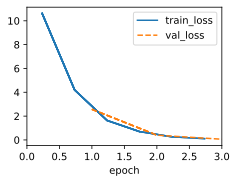

In [25]:
model = LinearRegressionScratch(2, lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

In [26]:
with torch.no_grad():
    print(f'error in estimating w: {data.w - model.w.reshape(data.w.shape)}')
    print(f'error in estimating b: {data.b - model.b}')

error in estimating w: tensor([ 0.1343, -0.1789])
error in estimating b: tensor([0.2681])


### 3.4.5.summary

* 완전한 기능의 신경망 모델과 훈련 loop 구현

* data loader, a model, a loss function, an optimization procedure, and a visualization and monitoring tool을 built

### discussions or takeaway messages

1. 딥러닝 시스템을 설계하기 위한 기초 구현

2. 신경망 모델, 훈련 loop

3. data loader, a model, a loss function, an optimization procedure, and a visualization and monitoring tool

## 4.1.Softmax Regression

단순히 squared errors를 줄이는 것 보다 추정에 더 많은 것이 있다.

어떤 범주에 초점을 맞추는 "분류"를 다뤄보자

1) class에 예제를 hard assignments
2) soft assignments : 카테고리가 적용될 확률을 평가하는 문제

두개 이상의 label -> multi-label classification

#### 4.1.1.1.linear model

#### 4.1.1.1.2.the softmax
* softmax : classification에서 출력 값을 확률로 변환하는데 사용

* classification의 어려움 : 출력값이 확률이 아닐 수 있음 , 출력값이 음수일 가능성

-> softmax function!

: 모든 출력값을 지수함수로 변환(양수값) -> 정규화

* softmax 특징 : 순서를 보존하기 때문에 softmax를 계산하여 어떤 class가 가장 높은 확률로 할당되었는지 결정할 필요가 없음(softmax를 적용하지 않아도 가장 큰 zi가 가장 높은 확률의 class)

#### 4.1.1.1.3.vectorization

### 4.1.2.loss function

#### 4.1.2.1.log-likelihood
* likelihood : 확률 분포가 가정된 상황에서 관측값이 가지는 확률값
* soft max함수가 각 class에 대한 조건부 확률을 vector형태로 반환 (각 class가 정답일 확률)
* dataset에서 각 label는 one-hot encoding으로 표현. 맞으면 1, 틀리면 0
* 각 label이 독립적으로 추출된다고 가정!
* negative log-likelihood : 모델의 확률과 실제 label의 차이 -> 손실 측정
* cross-entropy loss : softmax로 계산된 확률값과 one-hot encoding된 실제 label의 차이를 계산 |최소화하는게 목적| 손실 값은 0이상, 완벽하게 예측한다면 손실 값은 0

#### 4.1.2.2.softmax and cross-entropy loss
* 둘 다 classification에서 자주 사용

* softmax : 출력값을 확률값으로
* cross entropy loss : 실제 정답 label과 모델의 예측 확률간의 차이를 측정. 예측된 확률의 로그 값에 실제 레이블을 곱한 후 음수를 취하여 계산 | 정답에 대한 예측 확률이 높을수록 값이 작아짐
* cross entropy에서 모델의 parameter를 최적화하기 위해 손실함수 미분.
* 복잡한 경우 single이 아닌  entire distribution이 올 수 있음. 마찬가지로 corss entropy loss를 적용할 수 잇음. 손실함수는 label에 대한 분포의 기댓값을 구하는 방식. 이 방식은 lable이 확률적으로 여러 class에 걸쳐있을 때 효과적

### 4.1.3. Information Theory Basics

#### 4.1.3.1.entropy
* entropy : 데이터에 포함된 정보의 양. 엔드로피가 높다 = 데이터의 예측이 어렵다 = 정보가 많다

#### 4.1.3.2.suprisal
* 예측할 수 없는 사건이 발생했을 때의 놀라움. 예측할 수 없는게 클수록 커짐.
* 사건이 발생할 확률이 낮을수록 suprisal이 커짐
* entropy는 suprisal의 기대값.

#### 4.1.3.3.cross-entropy revisited
* cross-entropy : 실제 분포P와 모델이 예측한 분포Q의 차이.
* cross entropy를 classification에서 사용하는 이유 :
      1) 관측한 데이터의 likelihood 최대화
      2) suprisal 최소화

### 4.1.4.summary and discussion

* cross entropy loss : 확률적 접근을 사용하기 위해 softmax(신경망의 출력을 이산확률분포로 바꿔줌) 사용.

* softmax와 cross entropy loss의 미분이 label과 예측값 사이의 차이를 사용하는 방식 -> squared loss와 비슷

* 다만, 중요한 사항들이 생략되어 있음 : fully connected layer의 경우, 입력과 출력이 많아지면 계산비용이 입력개수*출력개수에 비례해서 커짐 -> approximation, compression을 사용해 해결

### discussions or takeaway messages

1. classification!

2. 신경망 -> softmax : 신경망의 출력을 확률로 바꿔줌 -> cross entropy loss

3. softmax : 지수함수(양수값으로 변환) -> 정규화

4. softmax는 순서를 보존해줌.

5. cross-entropy loss : 모델의 예측값과 실제 label의 차이를 계산

6. distribution이 오는 등 복잡한 경우에도 corss entropy loss이용 가능.

7. 사건이 발생할 확률이 낮 -> syprisal이 커짐

8. entropy가 높 = 데이터 예측이 어렵 = 정보가 많다

## 4.2. The Image Classification Dataset


In [27]:
%matplotlib inline
import time
import torch
import torchvision
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

### 4.2.1.loading the dataset

class FashionMNIST(d2l.DataModule):  #@save
    """The Fashion-MNIST dataset."""
    def __init__(self, batch_size=64, resize=(28, 28)):
        super().__init__()
        self.save_hyperparameters()
        trans = transforms.Compose([transforms.Resize(resize),
                                    transforms.ToTensor()])
        self.train = torchvision.datasets.FashionMNIST(
            root=self.root, train=True, transform=trans, download=True)
        self.val = torchvision.datasets.FashionMNIST(
            root=self.root, train=False, transform=trans, download=True)

In [29]:
class FashionMNIST(d2l.DataModule):
    """The Fashion-MNIST dataset."""
    def __init__(self, batch_size=64, resize=(28, 28)):
        super().__init__()
        self.save_hyperparameters()
        trans = transforms.Compose([transforms.Resize(resize),
                                    transforms.ToTensor()])
        self.train = torchvision.datasets.FashionMNIST(
            root=self.root, train=True, transform=trans, download=True)
        self.val = torchvision.datasets.FashionMNIST(
            root=self.root, train=False, transform=trans, download=True)

In [30]:
data = FashionMNIST(resize=(32, 32))
len(data.train), len(data.val)

100%|██████████| 26421880/26421880 [00:01<00:00, 16608330.97it/s]


Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 305599.22it/s]


Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5551236.08it/s]


Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5331426.42it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



(60000, 10000)

In [31]:
data.train[0][0].shape

torch.Size([1, 32, 32])

In [32]:
@d2l.add_to_class(FashionMNIST)
def text_labels(self, indices):
    """Return text labels."""
    labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
              'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [labels[int(i)] for i in indices]

### 4.2.2.reading a minibatch

reading from the training,test sets를 쉽게 하기 위해 creating one from scratch보다 내장된 data iterator를 사용.

각 반복에서 data iterator은 미니배치 데이터를 읽고 training data의 example를 랜덤으로 섞는다

In [33]:
@d2l.add_to_class(FashionMNIST)
def get_dataloader(self, train):
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=self.num_workers)

In [34]:
X, y = next(iter(data.train_dataloader()))
print(X.shape, X.dtype, y.shape, y.dtype)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


torch.Size([64, 1, 32, 32]) torch.float32 torch.Size([64]) torch.int64


In [35]:
tic = time.time()
for X, y in data.train_dataloader():
    continue
f'{time.time() - tic:.2f} sec'

'11.47 sec'

### 4.2.3.visualiztion

In [36]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    raise NotImplementedError

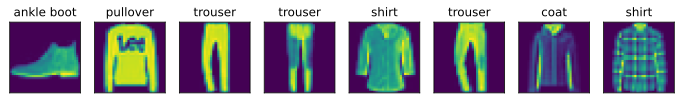

In [37]:
@d2l.add_to_class(FashionMNIST)
def visualize(self, batch, nrows=1, ncols=8, labels=[]):
    X, y = batch
    if not labels:
        labels = self.text_labels(y)
    d2l.show_images(X.squeeze(1), nrows, ncols, titles=labels)
batch = next(iter(data.val_dataloader()))
data.visualize(batch)

### 4.2.4.summary
* Fashion-MNIST : 의류 이미지를 10 categories로 분류하는 dataset
* 이미지 데이터 -> tensor(batch size, # of channels, 높이, 너비)
* data iterator : 효율을 위해 중요함

### discussions or takeaway messages

1. 대용량 dataset을 처리할 때 데이터를 한번에 메모리에 올리기 힘듦 -> batch size로 나눠서 미니배치를 순서대로 모델에 공급 : data iterator

2. data iterator의 기능 : 전체 데이터를 미니배치로 쪼개 메모리에 공급 / 데이터 shuffling / 병렬처리 및 비동기 데이터 로딩 / preprocessing

3. data iterator의 장점 : 대용량 dataset 처리 / 메모리 효율 / 훈련 속도 높이기 / 데이터 전처리 자동화

## 4.3. The Base Classification Model

In [38]:
import torch
from d2l import torch as d2l

### 4.3.1.the classifier class

validation_step에서 validation batch에 대한 손실값과 분류 정확도를 보고

every num_val_batches에 대해 업데이트를 그림 -> 전체 검증 데이터에 대한 평균 손실과 정확도를 생성

In [39]:
class Classifier(d2l.Module):
    def validation_step(self, batch):
        Y_hat = self(*batch[:-1])
        self.plot('loss', self.loss(Y_hat, batch[-1]), train=False)
        self.plot('acc', self.accuracy(Y_hat, batch[-1]), train=False)

@d2l.add_to_class(d2l.Module)  #@save
def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(), lr=self.lr)

### 4.3.2.accuracy

accuarcy는 모델이 예측한 값이 실제 정답과 일치한 경우의 비율. 정확도를 최적화하는 것은 어렵지만 classification에서는 중요한 성능 지표.

y_hat이 여러 class에 대한 확률 점수를 담고있는 행렬이라고 하자. 예측된 확률중 가장 높은 확률의 class가 무엇인지 알기 위해 argmax. 예측한 class와 실제 정답 y를 비교.

예측된 값과 실제값을 비교할 때(==)를 위해 데이터 형식을 맞춰야함. 비교 결과는 tensro의 형태로 똑같으면1, 다르면 0. -> 1과 0을 모두 더해 맞은 예측의 개수 -> 정확도 계산

In [40]:
@d2l.add_to_class(Classifier)
def accuracy(self, Y_hat, Y, averaged=True):
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
    preds = Y_hat.argmax(axis=1).type(Y.dtype)
    compare = (preds == Y.reshape(-1)).type(torch.float32)
    return compare.mean() if averaged else compare

### 4.3.3.summary

* classification에서 가장 중요한 것은 accuracy
* we train classifiers to optimize a variety of other objectives for statistical and computational reasons


### discussions or takeaway messages

1. classification에서 accuracy

2. 여러 class에 대한 확률 변수 -> argmax : 가장 높은 값의 class찾기 -> 실제값과 비교 -> 평균내기

3. classification에서 다른 성능지표?

     : accuacy , precision(PPV) , recall(TPR) , F1 score : recall과 precision의 조화 평균.

      그 이외에도 error rate, specificity, fall out 등

	* error rate : 모델이 전체 데이터에서 예측이 틀린 비율
	* specificity : 특이도 TNR(True Negative Rate)
	* fall out : 위양성률 FPR(False Positive Rate)

## 4.4. Softmax Regression Implementation from Scratch

In [41]:
import torch
from d2l import torch as d2l

### 4.4.1.the softmax

In [42]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdims=True), X.sum(1, keepdims=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

In [43]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdims=True)
    return X_exp / partition  # The broadcasting mechanism is applied here

In [44]:
X = torch.rand((2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.2000, 0.1405, 0.1971, 0.1645, 0.2980],
         [0.1476, 0.3027, 0.1534, 0.2044, 0.1920]]),
 tensor([1.0000, 1.0000]))

### 4.4.2.the model

In [45]:
class SoftmaxRegressionScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W = torch.normal(0, sigma, size=(num_inputs, num_outputs),
                              requires_grad=True)
        self.b = torch.zeros(num_outputs, requires_grad=True)

    def parameters(self):
        return [self.W, self.b]

In [46]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def forward(self, X):
    X = X.reshape((-1, self.W.shape[0]))
    return softmax(torch.matmul(X, self.W) + self.b)

### 4.4.3.the cross-entropy loss

In [47]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

In [48]:
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[list(range(len(y_hat))), y]).mean()

cross_entropy(y_hat, y)

tensor(1.4979)

In [49]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def loss(self, y_hat, y):
    return cross_entropy(y_hat, y)

### 4.4.4.training

10 epochs로 모델 학습

the number of epochs (max_epochs), the minibatch size (batch_size), and learning rate (lr)은 조정 가능 파라미터.

기본 훈련 루프에서 학습되지는 않지만, 훈련과 일반화 성능 모두에 영향을 미침.

실제로는 데이터의 validation split에서 값을 선택한 다음, test split에서 최종 모델을 평가할 수 있음

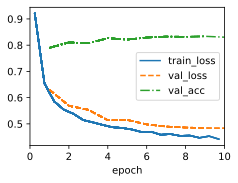

In [50]:
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

### 4.4.5.prediction

In [51]:
X, y = next(iter(data.val_dataloader()))
preds = model(X).argmax(axis=1)
preds.shape

torch.Size([256])

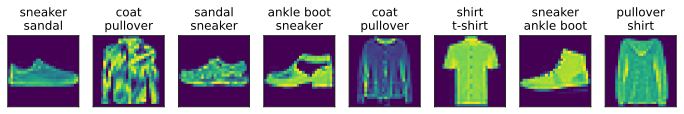

In [52]:
wrong = preds.type(y.dtype) != y
X, y, preds = X[wrong], y[wrong], preds[wrong]
labels = [a+'\n'+b for a, b in zip(
    data.text_labels(y), data.text_labels(preds))]
data.visualize([X, y], labels=labels)

### 4.4.6.summary

선형 회귀, 분류 문제를 해결하는 기본을 배움.

다음 section에서는 deep learning frameworks를 통해 모델을 효율적으로 구현


### discussions or takeaway messages

1. 실제로 softmax함수부터 model을 정의하고, training, prediction까지 따라 해봄

## 5.1. Multilayer Perceptrons

신경망층에 대해서 공부

In [53]:
%matplotlib inline
import torch
from d2l import torch as d2l

### 5.1.1.hidden layers

#### 5.1.1.1.limitations of linear models

#### 5.1.1.2.incorporating hidden layers
* MLP : Multilayer Perceptron, 다층 퍼셉트론
* 선형모델의 경우 입력-출력의 관계를 선형적으로 표현하므로 복잡한 패턴을 학습하기 어려움 -> hidden layer를 추가하여 비선형적이고 더 복잡한 관계를 모델링
* 은닉층을 추가하면 신경망이 더 많은 정보를 학습할 수 있음

* MLP
* 은닉층 포함하는 방법 -> 여러개의 fully connected layers를 쌓는것. input layer - 다수의 hidden layers - output layer

* 은닉층과 출력층에서 각각의 neuron은 이전 층의 모든 뉴런과 연결되어 있음 (fully connected) : 입력이 은닉층의 모든 뉴런에 영향을 미치고, 은닉층의 각 뉴런은 출력층의 모든 뉴런에 영향을 미침
* 입력층은 실제 계산을 하지 않음 -> MLP에서 실제 계산이 이루어지는 층은 은닉층과 출력층!

#### 5.1.1.3.from linear to nonlinear
* linear model의 한계 : 여러 층을 쌓아도 하나의 선형변환(affine transformation)에 불과함
* 은닉층이 단순히 선형변환이라면 입력에 대해 출력까지의 변환은 여전히 선형적이라 복잡한 패턴을 학습하기 어려움 -> 은닉층에 비선형성이 없을 경우 선형 모델의 한계가 그대로 나타남

##### 5.1.1.4.universal approximators
* universal approximators theorem -> 하나의 hidden layer만 있는 MLP라도, 충분히 많은 노드와 적절한 가중치가 있으면 이 신경망은 어떤 함수라도 근사할 수 있음 : 단일 은닉층만으로도 이론적으로는 복잡한 함수들을 모두 표현가능하다!

* 근데 이론적으로는 그런데,,,실제로 적절한 가중치 찾기는 매우 어려움,,,

* 실제로 단일 은닉층으로 모든 문제를 해결하려면 비효율적임 -> kernel methods, deeper neural networks 등 다른 방법들이 더 효율적

* deeper networks가 더 복잡한 함수들을 효율적으로 모델링.



### 5.1.2.activation functions

#### 5.1.2.1.ReLU function
* ReLU : 간단한 비선형 변환. input이 양수 -> 그대로 출력, input이 음수 -> 출력을 0으로
* piecewise linear function로, 선형구간이 양수와 음수 2가지로 나뉨
* ReLU 함수의 미분은 양수 구간에서는 1이고, 음수 구간에서는 0
* ReLU는 파생 함수가 간단해서 계산 효율이 좋음 ,vanishing gradient problem에 도움이 됨(특히 deep neural networks에서), ReLU의 도함수가 0 또는 1이기 때문에 최적화 과정에서 잘 수렴

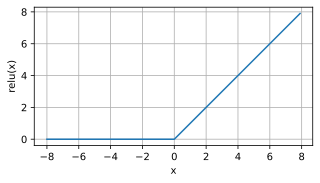

In [54]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

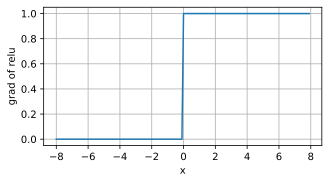

In [55]:
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

#### 5.1.2.2.sigmoid function

* 입력값이 임의의 실수(-∞, ∞) 일 때, 출력을 0~1로
* 입력값이 매우 작으면 0에 가까워지고, 입력값이 매우 크면 1에 가까워짐. 중간값 0 근처에서는 출력이 급격히 변함
* 과거에는 sigmoid func가 뉴런의 동작을 모델링하는데 사용
* 현대에는 이진 분류 문제에서 출력 뉴런의 활성화 함수로 사용 : 출력값을 확률로 해석할 수 있기 때문.
* sigmoid는 softmax의 특수한 경우로 볼 수 있음
* sigmoid대신 ReLU를 사용 : sigmoid가 최적화에서 문제가 있어서

    1) vanishing gradient problem : 입력값이 매우 크거나 작으면 기울기가 0이 됨 -> 기울기가 사라짐 -> 모델의 학습 속도가 느려지거나 학습이 멈출수도 있음 -> 학습이 제대로 안됨

    2) Saturation problem : 활성화 함수의 출력이 1 or 0에 매우 가까움 -> 가중치와 편향을 업데이트하기 어려워짐 -> 신경망의 학습이 제대로 안됨

* sigmoid는 이진분류문제와 RNN에서 정보 흐름을 제어하는데 잘 사용되고 있음
* 미분 -> 입력값이 0에 가까울때 미분값이 가장 크고, 멀어질수록 미분값이 0에 가까워짐

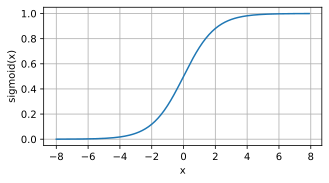

In [56]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

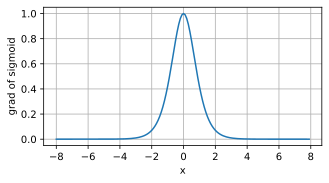

In [62]:
x.grad.data.zero_() #이전의 gradient clear
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

#### 5.1.2.3.tanh function

* Tanh func : hyperbolic tangent함수로, 수식을 통해 입력값 -> -1~+1
* 0에 가까울수록 선형적으로 동작, 멀어질수록 출력이 +1과 -1에 가까워짐
* sigmoid와 차이점 -> tanh는 좌우 대칭, 출력값의 중심이 0, -1 ~ +1 -> 균형잡힌 출력을 제공하여 학습 속도를 빠르게
* 도함수 : 입력이 0에 가까울수록 도함수는 1에 가까워짐. 입력이 멀어질수록 도함수는 0에 수렴한다. -> *gradient vanishing problem* 발생

* tanh func 과 sigmoid func의 기울기 관련 비교!
    
    tanh : -1 ~ +1

    sigmoid : 0 ~ 1

    sigmoid의 경우 기울기가 0~1으로 기울기의 부호가 같으면 최적의 가중치를 찾아가는 과정에서 직선 ( + -> - -> + ...)가 아니라 + -> + or - -> - 로 움직여서 zigzag 형태로 진행됨. 직선으로 최적의 가중치를 바로 찾아갈 수 없으므로 속도가 늦어짐



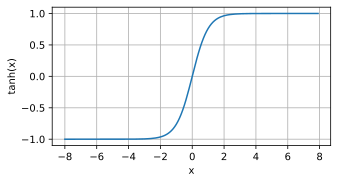

In [58]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

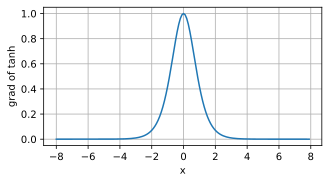

In [61]:
x.grad.data.zero_() #이전의 gradient clear
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

### 5.1.3.summary and discussion

* ReLU 함수가 sigmoid, tahn보다 최적화에 적합하다

* ReLU 함수의 장점?

    1) 계산 효율성

    2) gradient vanishing problem 방지

    3) Saturation problem 방지

    4) ReLU는 sparse activation(희소 활성화)를 생성
     => 희소 활성화 : 많은 뉴런이 0을 출력하게 하여 활성화를 적게 -> 계산비용이 줄고 과적합을 줄이는데 이득

* ReLU 함수의 단점?

    1) 입력값이 음수이면 기울기가 0이 되어 가중치 업데이트가 제대로 안될 수 있음 : Dead Neuron , Dying ReLU -> Leaky ReLU 함수를 사용해서, ReLU함수의 음수 부분에 작은 기울기를 추가해서 음수 값에 대한 기울기가 0인 문제를 방지

    2) 출력값은 0 또는 양수이고, 기울기도 0 또는 1인 양수 -> zigzag

*

### discussions or takeaway messages

1. 신경망 : input layer + hidden layer(s) + output layer

2. MLP : Multilayer Perceptron, 다층 퍼셉트론

3. 선형모델의 경우 입-출력 관계를 선형적으로 표현. 복잡한 패턴 학습이 어려워서 -> hidden layer사용. hidden layer는 비선형적이여야 복잡한 학습 가능

4. 입력층과 출력층에서 각각의 뉴런은 이전층의 모든 뉴런과 fully connected

5. universal approximators theorem : 하나의 hidden layer만 있는 MLP라도, 많은 노드와 적절한 가중치가 있으면 어떤 함수라도 근사할 수 있음(이론은 그런데 실제로는 다른 방법을 사용하는게 효율적)

6. ReLU : 간단한 비선형 변환. input이 양수 -> 그대로 출력, input이 음수 -> 0을 출력

7. ReLU 장점 : 계산효율적 / 기울기 소멸 문제에 괜찮음 / 최적화 과정에서 잘 수렴

8. ReLU 단점 : Dying ReLU / 기울기가 0~1 : zigzag

9. sigmoid : 입력값이 실수일때 , 출력을 0~1로

10. sigmoid 단점 : 기울기 소멸 문제 / 포화문제 | 기울기가 0~1이여서 학습에 어려움(zigzag)

11. tahn : 입력값을 -1~+1의 출력으로.

12. tahn 단점 : 기울기 소실 문제

13. ReLU가 sigmoid나 tahn보다 최적화에 적합. 더 많이 쓴다

14. 공부하고 다른 자료들도 찾아보면서 어느정도 알 것 같은데 자세히 생각해보면 헷갈리거나 궁금한 것도 많아서,,,더 공부해야겠다



## 5.2. Implementation of Multilayer Perceptrons


In [63]:
import torch
from torch import nn
from d2l import torch as d2l

#### 5.2.1.implementation from scratch

#### 5.2.1.1.initializing model parameters



In [64]:
class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) * sigma)
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))
        self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs) * sigma)
        self.b2 = nn.Parameter(torch.zeros(num_outputs))

#### 5.2.1.2.model

In [65]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

In [66]:
@d2l.add_to_class(MLPScratch)
def forward(self, X):
    X = X.reshape((-1, self.num_inputs))
    H = relu(torch.matmul(X, self.W1) + self.b1)
    return torch.matmul(H, self.W2) + self.b2

#### 5.2.1.3.training

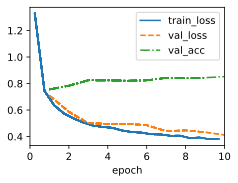

In [67]:
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

### 5.2.2.concise implementation

#### 5.2.2.1.model

In [68]:
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), nn.LazyLinear(num_outputs))

#### 5.2.2.2.training

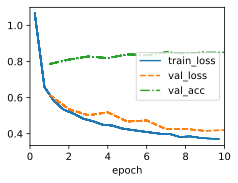

In [69]:
model = MLP(num_outputs=10, num_hiddens=256, lr=0.1)
trainer.fit(model, data)

### 5.2.3.summary

* deep networks연습
* 훈련 알고리즘과 데이터 로더를 재사용 가능
* MLP 구현하다가 모델 확장이 어려움 ->  중간에 층을 넣고 싶으면 (42-43사이에) 이름 짓기가 힘듦
* 네트워크를 처음부터 구현하면 framework가 meaningful performance optimizations하기 힘들어짐
* 다음 단계는 이미지 고려!! -> 통계적 기초와 모델을 효율적으로 계산하는 방법을 review


### discussions or takeaway messages

1. 모델 구현, 학습 함

2. 지금은 보고 코딩했지만 다음에 안보고 하나하나 해볼것

## 5.3. Forward Propagation, Backward Propagation, and Computational Graphs

backward propagation에 대해 알아보

### 5.3.1.forward propagation

forward propagation : 입력층에서 출력층으로 가는 과정에서 중간 변수를 계산하고 저장하는 과정.

### 5.3.2.computational graph of forward propagation

* 계산그래프 -> 연산자와 변수간의 의존성을 시각

### 5.3.3.backpropagation

* backpropagation : 신경망의 파라미터의 기울기 계산
* 출력층 -> 입력층 , 역순으로 계산, cahin rule

### 5.3.4.training neural networks

* 신경망을 훈련할때, forward propagation과 backpropagation은 서로 의존적.
* forward에서 앞으로 계산 그래프를 탐색하면서 모든 변수를 계산 -> 그 변수들이 back에서 쓰임
* 모델 파라미터 초기화 된 후, 신경망 훈련 : forward -> back -> .... 번갈아가면서 수행. forward로 예측을 하고, back으로 parameter의 기울기를 계산하여 업데이트
* 역전파는 전방 전파에서 저장된 중간 값들을 재사용하여 중복 계산을 피함 -> 전방전파에서 계산된 중간 값들은 역전파가 끝날때까지 메모리에 저장해둬야함
* network 수와 batch size가 클수록 중간 값의 크기가 큼 -> deeper network, bigger batch 일수록 메모리 많이 필요


### 5.3.5.summary

* forward는 신경망의 계산 그래프 안의 중간 변수를 입력층->출력층 순서대로 계산 후 저장

* backward는 신경망의 중간변수와 파라미터의 gradient를 출력층->입력층 방향으로 계산

* forward에서 계산한 중간변수를 backward에서 이용함

* forward에서 계산한 중간변수를 메모리에 저장해야해서 꽤 많은 메모리가 필요

### discussions or takeaway messages

1. forward propagation : 입력층 -> 출력층 순서로 계산, 중간값들은 메모리에 저장

2. backpropagation : 출력층 -> 입력층 순서로 파라미터 gradient계산, forward의 중간값들을 이용 , chain rule

3. forward에서 중간값을 메모리에 저장해둬야 해서 큰 메모리 필요

4. forward로 모든 neural network를 최적화하려면 굉장히 큰 연샨이 필요함 -> back으로 함으로써 연산량 줄여